In [ ]:
pip install tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting unin

In [ ]:
#pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.layers import Input , GlobalAveragePooling2D , BatchNormalization , Dropout , Dense
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

In [ ]:
!nvidia-smi

Fri Apr 28 08:44:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = ('/content/drive')

train_dir = os.path.join(dir , '/content/drive/MyDrive/Distracted Driver Detection/Train')
#validation_dir = os.path.join(dir , '/content/drive/MyDrive/Distracted Driver Detection/Train')
test_dir = os.path.join(dir , '/content/drive/MyDrive/Distracted Driver Detection/test')
data = pd.read_csv(os.path.join(dir , '/content/drive/MyDrive/Distracted Driver Detection/driver_imgs_list.csv'))

In [ ]:
data.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


<Axes: >

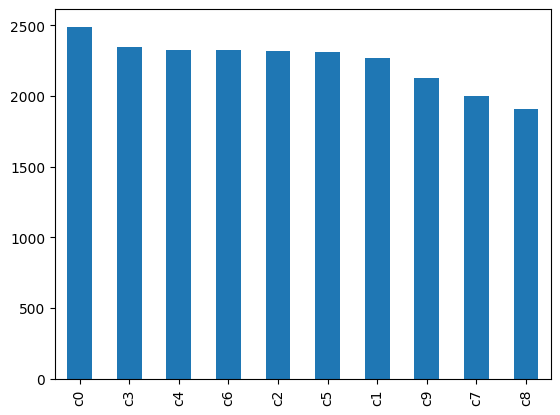

In [ ]:
class_counts = data.classname.value_counts()

class_counts.plot(kind = 'bar')

In [ ]:
IMG_SIZE = (224 ,224)
BATCH_SIZE = 16

In [ ]:
train_gen = ImageDataGenerator(width_shift_range = 0.3,
                               height_shift_range = 0.3,
                               shear_range = 0.3,
                               zoom_range = 0.4,
                               validation_split = 0.2)

test_gen = ImageDataGenerator()

In [ ]:
train_data = train_gen.flow_from_directory(train_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         subset='training',
                                         seed = 42)

Found 16425 images belonging to 10 classes.


In [ ]:
#Validating through the same Train data
val_data = train_gen.flow_from_directory(train_dir,
                                         target_size=IMG_SIZE,
                                         batch_size=BATCH_SIZE,
                                         subset='validation',
                                         seed = 42)

Found 4102 images belonging to 10 classes.


In [ ]:
from platform import python_version
print(python_version())

print(tf. __version__)

3.10.11
2.9.1


In [ ]:
pip install tfa-nightly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.5/591.5 kB 37.7 MB/s eta 0:00:00


In [ ]:
pip install tensorflow_addons


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 31.8 MB/s eta 0:00:00


In [ ]:
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.9.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're us

In [ ]:
import tensorflow as tf
from tensorflow import *

In [ ]:
def model(num_class):
    inputs = Input(shape=(224,224,3))
    base = EfficientNetB3(include_top = False,
                         weights='imagenet')(inputs)
    x = GlobalAveragePooling2D()(base)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_class , activation='softmax')(x)

    model = Model(inputs = inputs , outputs = outputs)
    model.compile(loss = 'categorical_crossentropy',
                 optimizer = tf.optimizers.Adam(1e-4),
                 metrics = ['accuracy',
              tf.keras.metrics.Precision(),
              tf.keras.metrics.Recall()
               ,tfa.metrics.F1Score(num_classes=num_class, average='macro', threshold=0.5)
              ])
    return model

In [ ]:
num_class = len(class_counts )
num_class

10

In [ ]:
model = model(num_class)
model.summary()

43941136/43941136 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb3 (Functional)  (None, None, None, 1536)  10783535 
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                              

In [ ]:
ck = ModelCheckpoint('/content/drive/MyDrive/Distracted Driver Detection/saved models/Testing.hdf5' , save_best_only=True,monitor='val_loss',mode='min')
es = EarlyStopping(monitor = 'val_loss', patience = 5)

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13894812095380596411
xla_global_id: -1
,
 name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14395703296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5945848471256087206
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
!pip install sklearn-json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
wd = lambda: 1e-02 * schedule(step)

In [ ]:
print(tf. __version__)

2.9.1


In [ ]:
#Run this cell, if you want to fit the model again else run the next cell
history = model.fit(train_data ,
                   epochs = 50,
                   validation_data = val_data ,
                   callbacks=[es,ck],
                   verbose = 1)

Epoch 1/50
1027/1027 [==============================] - 5966s 6s/step - loss: 0.7221 - accuracy: 0.7714 - precision: 0.8649 - recall: 0.7237 - f1_score: 0.7522 - val_loss: 0.1611 - val_accuracy: 0.9495 - val_precision: 0.9590 - val_recall: 0.9417 - val_f1_score: 0.9450
Epoch 2/50
1027/1027 [==============================] - 492s 479ms/step - loss: 0.2079 - accuracy: 0.9352 - precision: 0.9466 - recall: 0.9267 - f1_score: 0.9307 - val_loss: 0.0934 - val_accuracy: 0.9703 - val_precision: 0.9759 - val_recall: 0.9678 - val_f1_score: 0.9706
Epoch 3/50
1027/1027 [==============================] - 490s 477ms/step - loss: 0.1362 - accuracy: 0.9570 - precision: 0.9638 - recall: 0.9525 - f1_score: 0.9546 - val_loss: 0.0705 - val_accuracy: 0.9785 - val_precision: 0.9819 - val_recall: 0.9761 - val_f1_score: 0.9764
Epoch 4/50
1027/1027 [==============================] - 489s 476ms/step - loss: 0.1075 - accuracy: 0.9644 - precision: 0.9701 - recall: 0.9610 - f1_score: 0.9624 - val_loss: 0.0821 - val

In [ ]:
history = model.fit(train_data ,
                   epochs = 20,
                   validation_data = val_data ,
                   callbacks=[es,ck],
                   verbose = 1)

Epoch 1/20
930/930 [==============================] - 4463s 5s/step - loss: 0.8087 - accuracy: 0.7387 - precision: 0.8398 - recall: 0.6853 - f1_score: 0.7460 - val_loss: 0.1690 - val_accuracy: 0.9430 - val_precision: 0.9570 - val_recall: 0.9349 - val_f1_score: 0.9461
Epoch 2/20
930/930 [==============================] - 490s 527ms/step - loss: 0.2225 - accuracy: 0.9323 - precision: 0.9461 - recall: 0.9209 - f1_score: 0.9336 - val_loss: 0.1057 - val_accuracy: 0.9685 - val_precision: 0.9766 - val_recall: 0.9642 - val_f1_score: 0.9706
Epoch 3/20
930/930 [==============================] - 464s 499ms/step - loss: 0.1506 - accuracy: 0.9540 - precision: 0.9607 - recall: 0.9471 - f1_score: 0.9548 - val_loss: 0.0852 - val_accuracy: 0.9761 - val_precision: 0.9792 - val_recall: 0.9734 - val_f1_score: 0.9774
Epoch 4/20
930/930 [==============================] - 440s 473ms/step - loss: 0.1227 - accuracy: 0.9629 - precision: 0.9689 - recall: 0.9587 - f1_score: 0.9638 - val_loss: 0.0571 - val_accurac

In [ ]:
history = model.fit(train_data ,
                   epochs = 20,
                   validation_data = val_data ,
                   callbacks=[es,ck],
                   verbose = 1)

Epoch 1/20
930/930 [==============================] - 3765s 4s/step - loss: 0.7981 - accuracy: 0.7422 - precision: 0.8396 - recall: 0.6910 - f1_score: 0.7504 - val_loss: 0.1713 - val_accuracy: 0.9438 - val_precision: 0.9551 - val_recall: 0.9338 - val_f1_score: 0.9445
Epoch 2/20
930/930 [==============================] - 454s 488ms/step - loss: 0.2293 - accuracy: 0.9296 - precision: 0.9424 - recall: 0.9187 - f1_score: 0.9312 - val_loss: 0.1008 - val_accuracy: 0.9653 - val_precision: 0.9704 - val_recall: 0.9618 - val_f1_score: 0.9671
Epoch 3/20
930/930 [==============================] - 449s 483ms/step - loss: 0.1489 - accuracy: 0.9537 - precision: 0.9610 - recall: 0.9483 - f1_score: 0.9553 - val_loss: 0.0764 - val_accuracy: 0.9752 - val_precision: 0.9805 - val_recall: 0.9739 - val_f1_score: 0.9780
Epoch 4/20
930/930 [==============================] - 446s 480ms/step - loss: 0.1188 - accuracy: 0.9643 - precision: 0.9698 - recall: 0.9595 - f1_score: 0.9653 - val_loss: 0.0660 - val_accurac

In [ ]:
model.save('/content/drive/MyDrive/Distracted Driver Detection/saved models/My_final1_saved.hdf5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Distracted Driver Detection/saved models/My_final1_saved.hdf5')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb3 (Functional)  (None, None, None, 1536)  10783535 
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 10)                15370 

In [ ]:
test_dir = os.path.join(dir , '/content/drive/MyDrive/Distracted Driver Detection/')
test_data = test_gen.flow_from_directory(test_dir ,
                                        target_size=IMG_SIZE,
                                        batch_size=BATCH_SIZE,
                                        classes = ['test'],
                                        shuffle = False)

Found 17474 images belonging to 1 classes.


In [ ]:
preds = model.predict(test_data)
preds

1094/1094 [==============================] - 427s 381ms/step


array([[0.12922464, 0.04809687, 0.16821451, ..., 0.07588436, 0.08766181,
        0.09046853],
       [0.09852338, 0.14319766, 0.06870341, ..., 0.10515908, 0.08058519,
        0.08175407],
       [0.11433283, 0.10485308, 0.08336657, ..., 0.10948484, 0.10247426,
        0.07043362],
       ...,
       [0.12096602, 0.13141392, 0.06149649, ..., 0.09974995, 0.07861328,
        0.08387674],
       [0.06447574, 0.21657898, 0.06775462, ..., 0.06547812, 0.07767865,
        0.10884213],
       [0.0990072 , 0.16313131, 0.09491418, ..., 0.11599873, 0.08796498,
        0.08920541]], dtype=float32)

In [ ]:
len(preds)

17493

In [ ]:
test_imgs = os.path.join(dir , '/content/drive/MyDrive/Distracted Driver Detection/test')
test_ids = sorted(os.listdir(test_imgs))
pred_df = pd.DataFrame(columns=['img','c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])


for i in range(1, len(preds)):
    pred_df.loc[ :,'img'] = test_ids[:]
    pred_df.loc[ : ,'c0':'c9'] = preds[:]


In [ ]:
print(len(test_ids))

17493


In [ ]:
pred_df

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,0.129225,0.048097,0.168215,0.180176,0.066765,0.028178,0.12533,0.075884,0.087662,0.090469
1,img_10.jpg,0.098523,0.143198,0.068703,0.113695,0.129248,0.099021,0.080113,0.105159,0.080585,0.081754
2,img_100.jpg,0.114333,0.104853,0.083367,0.111775,0.088367,0.109023,0.10589,0.109485,0.102474,0.070434
3,img_1000.jpg,0.073707,0.121464,0.105724,0.06253,0.148881,0.058229,0.169121,0.077058,0.101898,0.081389
4,img_100000.jpg,0.100578,0.144033,0.088345,0.08288,0.125782,0.083413,0.126991,0.095524,0.063504,0.08895
...,...,...,...,...,...,...,...,...,...,...,...
17488,img_28160.jpg,0.114717,0.139613,0.053936,0.096744,0.102734,0.090951,0.095488,0.142974,0.086591,0.076251
17489,img_28161.jpg,0.113608,0.162143,0.051405,0.085992,0.147707,0.104788,0.082724,0.079455,0.07938,0.092798
17490,img_28162.jpg,0.120966,0.131414,0.061496,0.106534,0.084918,0.110915,0.121517,0.09975,0.078613,0.083877
17491,img_28163.jpg,0.064476,0.216579,0.067755,0.082079,0.08902,0.104047,0.124046,0.065478,0.077679,0.108842


In [ ]:
pred_df = np.argmax(preds,axis=1)
pred_df

array([3, 1, 0, ..., 1, 1, 1])

In [ ]:

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
print(len(test_data))
print(len(preds))

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Distracted Driver Detection/saved models/My_final1.hdf5')

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
img = cv.imread(os.path.join(dir , '/content/drive/MyDrive/Distracted Driver Detection/test/img_12.jpg'))
img_resize = cv.resize(img,(254,254))
cv2_imshow(img_resize)


In [ ]:
test_imgs = img ##os.path.join(dir , '/content/drive/MyDrive/Distracted Driver Detection/test')
#test_ids = sorted(os.listdir(test_imgs))
pred_df = pd.DataFrame(columns=['img','c0','c1','c2','c3','c4','c5','c6','c7','c8','c9'])

pred_df.loc[ 6,'img'] = test_ids[6]
pred_df.loc[ 6,'c0':'c9'] = preds[6]

In [ ]:
pred_df

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
6,img_100002.jpg,0.125422,0.11624,0.08671,0.091168,0.069222,0.17205,0.108546,0.052181,0.101418,0.077043


In [ ]:
f = os.path.join(dir , '/content/drive/MyDrive/Distracted Driver Detection/Classes_Description.txt')
class_descr = open(f, 'r')
content = class_descr.read()
print(content)

classes; No. of Images; Description;

Class 0    → 1,02,087   → Safe Driving
Class 1    → 1,02,119   → using mobile phone with right hand
Class 2    → 1,02,090   → talking on phone with right hand
Class 3    → 1,02,064   → using mobile phone with left hand
Class 4    → 1,02,147   →  talking on phone with left hand
Class 5    → 1,02,073   → adjusting radio/ something with right hand
Class 6    → 1,02,144   → drinking something with right hand
Class 7    → 1,02,129   → turning back/taking something from back
Class 8    → 1,02,144   → makeup/ hair setting with hand
Class 9    → 1,01,725   → talking to co-passenger/ tuning head aside



In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Distracted Driver Detection/saved models/My_Model3.hdf5')

#loss, accuracy, f1_score, precision, recall = model.evaluate(test_data, verbose=1)
results = model.evaluate(val_data, verbose=1)
results

233/233 [==============================] - 908s 4s/step - loss: 0.1163 - accuracy: 0.9707 - precision: 0.9738 - recall: 0.9691 - f1_score: 0.9729


[0.11634314060211182,
 0.9706752896308899,
 0.9737766981124878,
 0.9690610766410828,
 0.9728964567184448]

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Distracted Driver Detection/saved models/My_final1.hdf5')

#loss, accuracy, f1_score, precision, recall = model.evaluate(test_data, verbose=1)
results = model.evaluate(val_data, verbose=1)
results

233/233 [==============================] - 983s 4s/step - loss: 0.0374 - accuracy: 0.9890 - precision: 0.9906 - recall: 0.9879 - f1_score: 0.9889


[0.03737679496407509,
 0.988969624042511,
 0.990558385848999,
 0.9878934621810913,
 0.9888802766799927]

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Distracted Driver Detection/saved models/My_Model1.hdf5')
#model = load_model('/content/drive/MyDrive/Distracted Driver Detection/saved models/DDD1.hdf5')
#model = load_model('/content/drive/MyDrive/Distracted Driver Detection/saved models/DDD2.hdf5')
#model = load_model('/content/drive/MyDrive/Distracted Driver Detection/saved models/My_final_DDD.hdf5')


#loss, accuracy, f1_score, precision, recall = model.evaluate(val_data, verbose=1)
results = model.evaluate(val_data, verbose=1)
results

233/233 [==============================] - 79s 326ms/step - loss: 0.0395 - accuracy: 0.9890


[0.03946821391582489, 0.988969624042511]

In [ ]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    img = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    img.savefig(os.path.join(model,"confusion_matrix.png"))
    return img

In [ ]:
preds = model.predict(val_data)
ypred = np.argmax(preds,axis=1)
ytest = np.argmax(val_data,axis=1)


233/233 [==============================] - 89s 328ms/step


In [ ]:
preds = model.predict(val_data)
ypred = np.argmax(preds,axis=1)
ytest = np.argmax(val_data,axis=1)


233/233 [==============================] - 75s 309ms/step


In [ ]:
predict = model.predict(val_data)

257/257 [==============================] - 2730s 11s/step


In [ ]:
predicted_data = np.argmax(predict,axis=1)

In [ ]:
testing_data = np.argmax(val_data,axis=1)

In [ ]:
print(val_data)

In [ ]:
len(val_data)

257

In [ ]:
len(predict)

4102